#melakukan import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#untuk mengabaikan warning
warnings.filterwarnings("ignore")

print("Semua Library diatas termuat")

Semua Library diatas termuat


In [3]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,CO,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,CO,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,CO,Good
3,1/4/2020,40,8,2,84,29.0,0,84,CO,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...,...
1091,12/27/2022,50,19,16,12,NaN,4,19,PM2.5,Moderate
1092,12/28/2022,51,20,16,12,NaN,4,20,PM2.5,Moderate
1093,12/29/2022,52,21,16,13,NaN,4,21,PM2.5,Moderate
1094,12/30/2022,53,22,17,13,NaN,4,22,PM2.5,Moderate


In [4]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

,Nama Feature,Penjelasan
1,Date,Tanggal pengukuran
2,PM10,Pengukuran Materi Partikulat
3,SO2,Pengukuran Sulfur Dioksida
4,CO,Pengukuran Karbon Monoksida
5,O3,Pengukuran ozon
6,NO2,Pengukuran Natrium DIoksida
7,Max,Nilai pengukuran tertinggi
8,Critical Component,Komponen nilai pengukuran tertinggi
9,Categoy,Kategori pencemaran udara baik atau tidak


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


In [6]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,1096.000000,1096.000000,1096.000000,1096.000000,1036.000000,1096.000000,1096.000000
mean,44.193431,18.738139,10.580292,18.820255,20.960425,2.374088,29.235401
std,10.826190,7.290818,8.068708,17.066338,12.467208,2.227808,15.907933
min,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,35.000000,13.000000,1.000000,10.000000,15.000000,0.000000,20.000000
50%,45.000000,17.000000,14.000000,12.000000,20.000000,3.000000,24.000000
75%,53.000000,23.000000,16.000000,21.000000,26.000000,4.000000,31.000000
max,66.000000,60.000000,28.000000,164.000000,81.000000,8.000000,164.000000


In [7]:
df["Category"].value_counts()

Category
Moderate     639
Good         393
Unhealthy     64
Name: count, dtype: int64

#data cleansing dan data preprocesing

# mengecek data yang hilang


In [9]:
df.isna().sum

<bound method DataFrame.sum of        Date  PM2.5   PM10    SO2     CO     O3    NO2    Max  \
0     False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...   
1091  False  False  False  False  False   True  False  False   
1092  False  False  False  False  False   True  False  False   
1093  False  False  False  False  False   True  False  False   
1094  False  False  False  False  False   True  False  False   
1095  False  False  False  False  False   True  False  False   

      Critical Component  Category  
0                  False     False  
1                  False     False  
2                  False     False  
3                  False     False  
4              

In [10]:
#mengecek outlier
df_baru = df[["PM2.5", "PM10", "SO2", "NO2", "CO", "Category"]]

In [11]:
#cara mengisi missing value dengan nilai mean pada O3
df["O3"]= df["O3"].fillna(df["O3"].mean())

In [12]:
df.isna().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

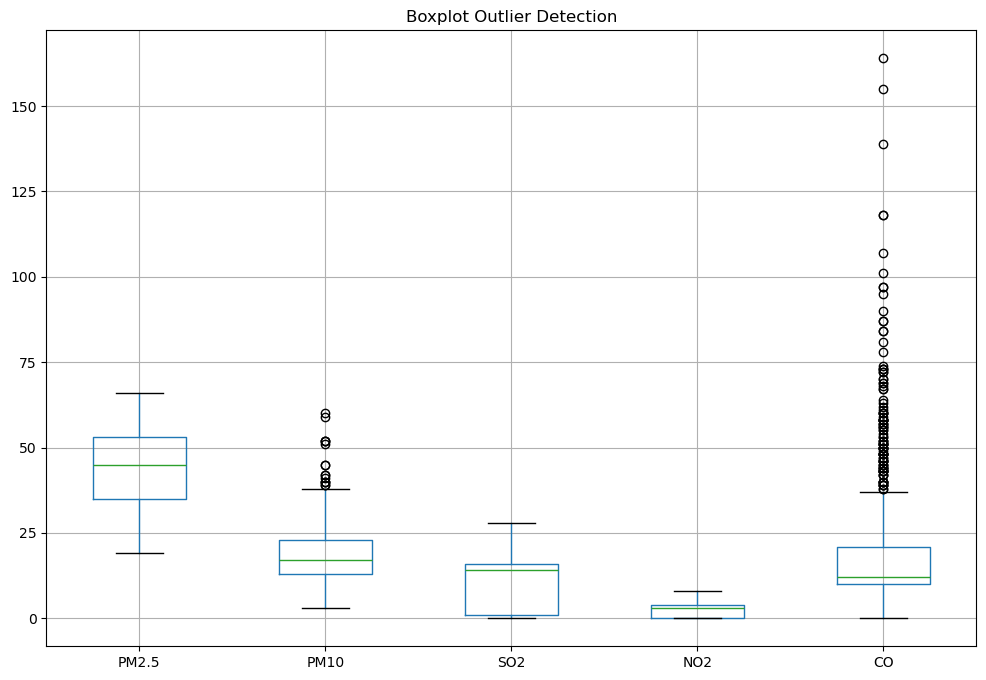

In [13]:
#mengecek outlier
#membuat boxplot outlier
plt.figure(figsize=(12,8))
df_baru.boxplot()
plt.title("Boxplot Outlier Detection")
plt.show()

In [14]:
df_baru.shape

(1096, 6)

In [15]:
#hilangkan outlier
def hapus_outlier(data):
    df_bersih = data.copy() #melakukan copy data kedalam variabel df_bersih
    for col in df_bersih.columns: #memanggil nama setiap kolom yang disimpan ke dalam variabel col untuk diproses
    #col=pm2.5
        Q1 = data[col].quantile(0.25) #untuk menghitung Q1
        Q3 = data[col].quantile(0.75) #untuk menghitung Q3
        IQR = Q3-Q1 #untuk menhitung IQR range antara Q3 dan Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q3 - 1.5 * IQR
        df_bersih = df_bersih [(df_bersih[col] > lower_bound)&(df_bersih[col]<upper_bound)]
    return df_bersih

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#label encoding
df_baru["Category"] = label_encoder.fit_transform(df_baru["Category"])

In [17]:
df_baru["Category"].value_counts()

Category
1    639
0    393
2     64
Name: count, dtype: int64

In [18]:
df_no_outlier = hapus_outlier(df_baru) #run hapus outlier

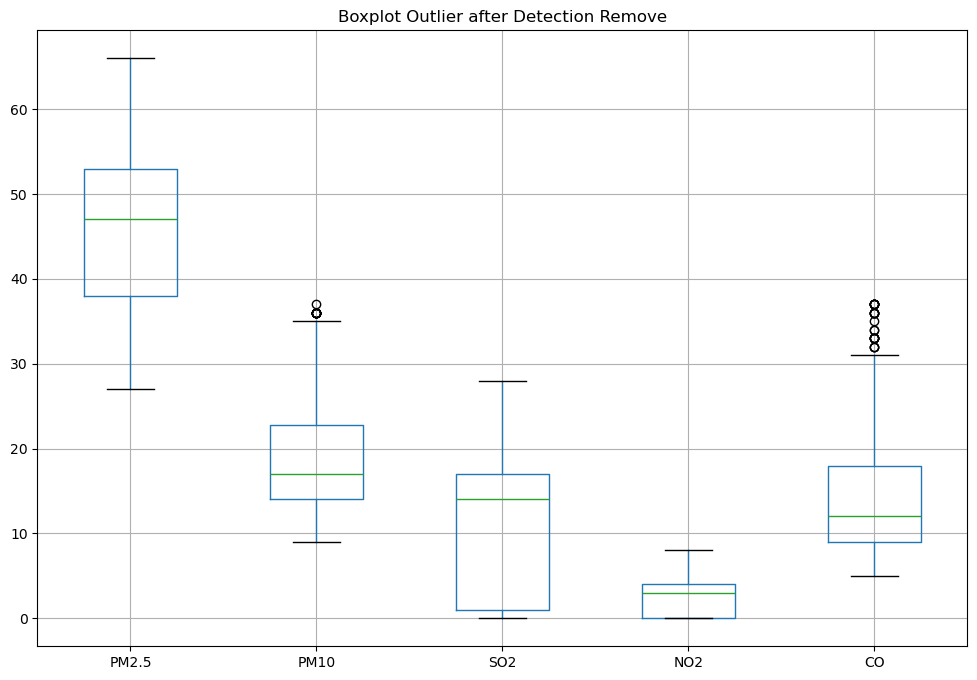

In [19]:
plt.figure(figsize=(12,8))
df_no_outlier[["PM2.5", "PM10", "SO2", "NO2", "CO"]].boxplot()
plt.title("Boxplot Outlier after Detection Remove")
plt.show()

In [20]:
df_no_outlier.shape

(922, 6)

In [21]:
print(df_baru.shape)
print(df_no_outlier.shape)

(1096, 6)
(922, 6)


In [22]:
# pembagian data latih dan Uji
from sklearn.model_selection import train_test_split

In [23]:
X = df_no_outlier.drop(["Category"], axis=1)
y = df_no_outlier["Category"]

In [24]:
X

,PM2.5,PM10,SO2,NO2,CO
12,31,11,2,0,29
19,34,14,2,0,34
25,31,19,2,0,32
56,48,15,2,0,16
57,50,22,2,0,19
...,...,...,...,...,...
1091,50,19,16,4,12
1092,51,20,16,4,12
1093,52,21,16,4,13
1094,53,22,17,4,13


In [25]:
y

12      0
19      0
25      0
56      1
57      1
       ..
1091    1
1092    1
1093    1
1094    1
1095    1
Name: Category, Length: 922, dtype: int32

In [26]:
#Machine Learning (pelatihan dan pengujian 3 rasio)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
rasio = [0.2, 0.3, 0.4]

In [28]:

# List model
models = [
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]


for test_size in rasio:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=42
    )
    
    print(f"\nHasil performa untuk rasio {test_size}:")
    print("=========================================")
    
    # Iterasi setiap model
    for name, model in models:
        # Training model
        model.fit(X_train, y_train)
        
        # Prediksi
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Hitung akurasi
        train_acc = accuracy_score(y_train, y_pred_train) * 100
        test_acc = accuracy_score(y_test, y_pred_test) * 100
        
        # Hasil
        print(f"Model {name}:")
        print(f"Akurasi Training: {train_acc:.2f}%")
        print(f"Akurasi Testing: {test_acc:.2f}%")
        print("-----------------------------------------")


Hasil performa untuk rasio 0.2:
Model Gradient Boosting:
Akurasi Training: 91.32%
Akurasi Testing: 81.62%
-----------------------------------------
Model K-Nearest Neighbors:
Akurasi Training: 85.07%
Akurasi Testing: 78.38%
-----------------------------------------
Model Random Forest:
Akurasi Training: 97.29%
Akurasi Testing: 82.70%
-----------------------------------------
Model AdaBoost:
Akurasi Training: 65.40%
Akurasi Testing: 64.86%
-----------------------------------------
Model Naive Bayes:
Akurasi Training: 52.37%
Akurasi Testing: 55.14%
-----------------------------------------

Hasil performa untuk rasio 0.3:
Model Gradient Boosting:
Akurasi Training: 92.40%
Akurasi Testing: 78.34%
-----------------------------------------
Model K-Nearest Neighbors:
Akurasi Training: 86.98%
Akurasi Testing: 75.09%
-----------------------------------------
Model Random Forest:
Akurasi Training: 97.98%
Akurasi Testing: 80.87%
-----------------------------------------
Model AdaBoost:
Akurasi T